# Atomap -- Images with more than one sublattice

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import atomap.api as am
import numpy as np
import hyperspy.api as hs

C:\Users\4DSTEM\anaconda3\lib\site-packages\pyUSID\viz\__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '


<IPython.core.display.Javascript object>


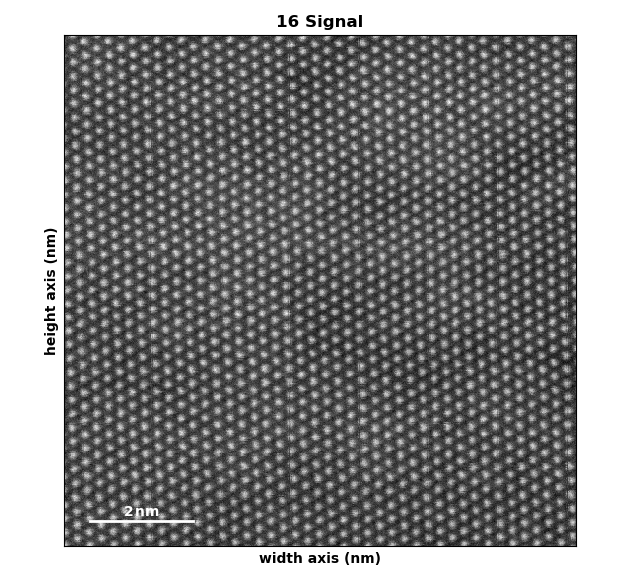

In [2]:
# Load the image

s = hs.load("/Michel/Datos/16/16.tif")
s.plot(colorbar=False, axes_ticks=False)

<IPython.core.display.Javascript object>


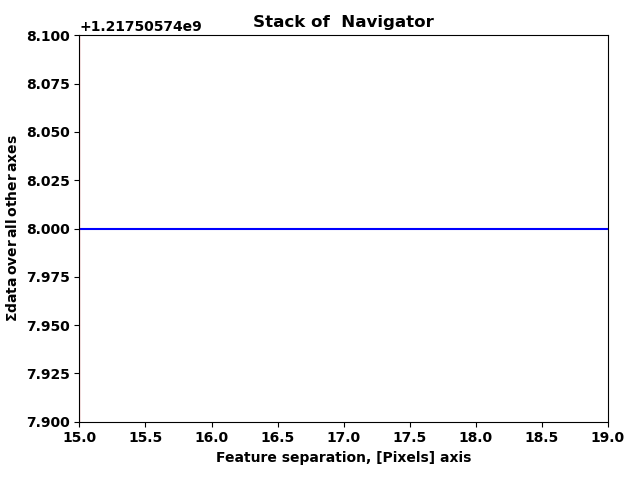

<IPython.core.display.Javascript object>


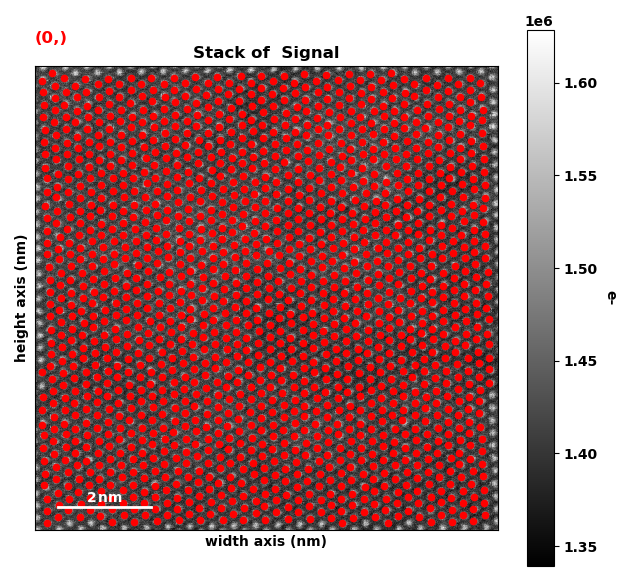

In [4]:
# Finding the feature separation

s_peaks = am.get_feature_separation(s, separation_range=(15, 20))
s_peaks.plot()

In [5]:
#Generate the initial positions for the atomic columns

A_positions = am.get_atom_positions(s, separation=15)

<IPython.core.display.Javascript object>


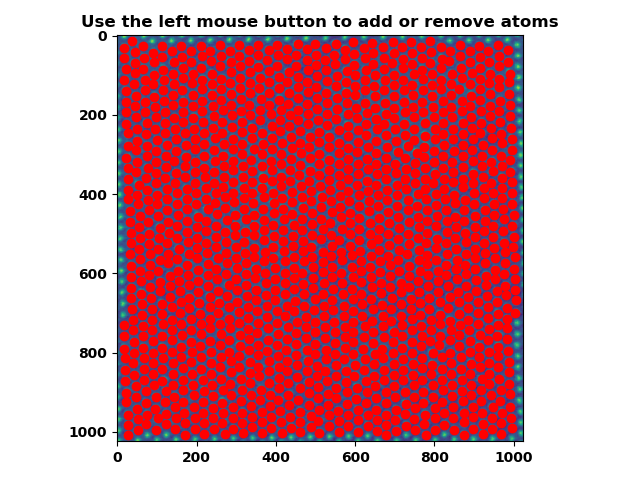

In [6]:
#Adding atoms using GUI

A_positions_new = am.add_atoms_with_gui(s, A_positions)

<IPython.core.display.Javascript object>


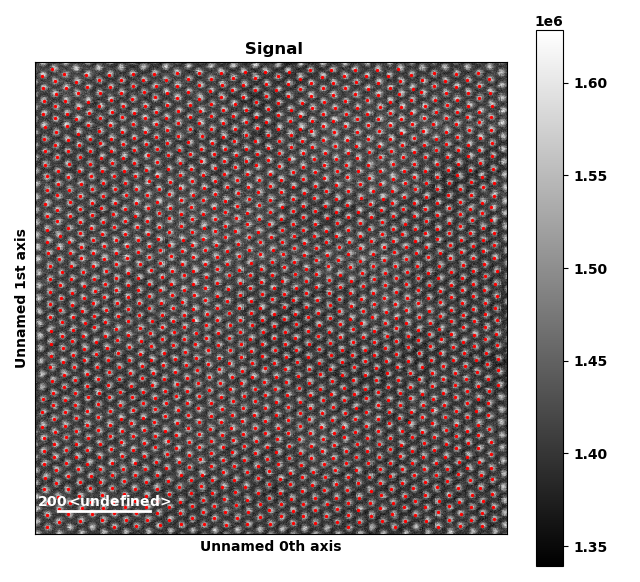

In [10]:
# Initialize a Sublattice

sublattice_A = am.Sublattice(A_positions_new, image=s.data, color='r')
sublattice_A.plot(markersize=2)

<IPython.core.display.Javascript object>


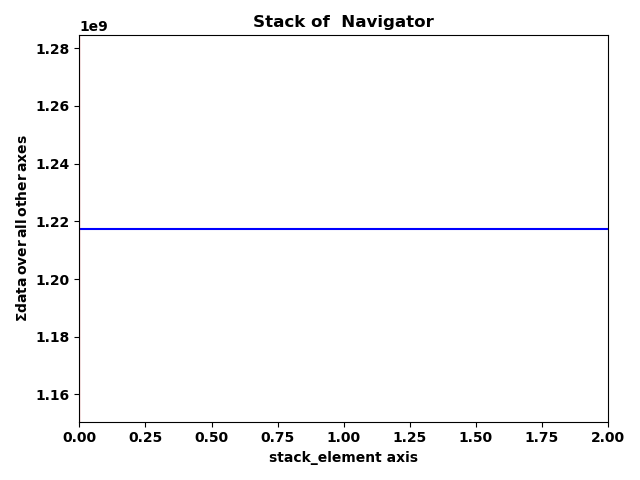

<IPython.core.display.Javascript object>


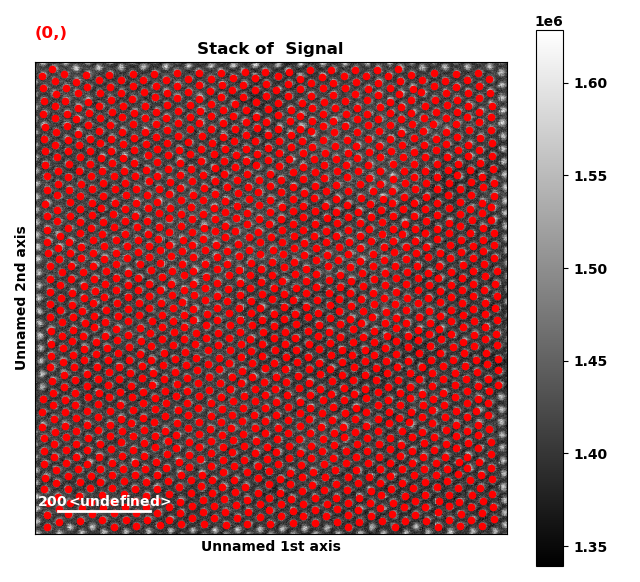

In [11]:
# Refine the position of the atomic columns using center of mass and 2D Gaussian fit

sublattice_A.find_nearest_neighbors()
sublattice_A.refine_atom_positions_using_center_of_mass()
sublattice_A.refine_atom_positions_using_2d_gaussian()
sublattice_A.get_position_history().plot()

<IPython.core.display.Javascript object>


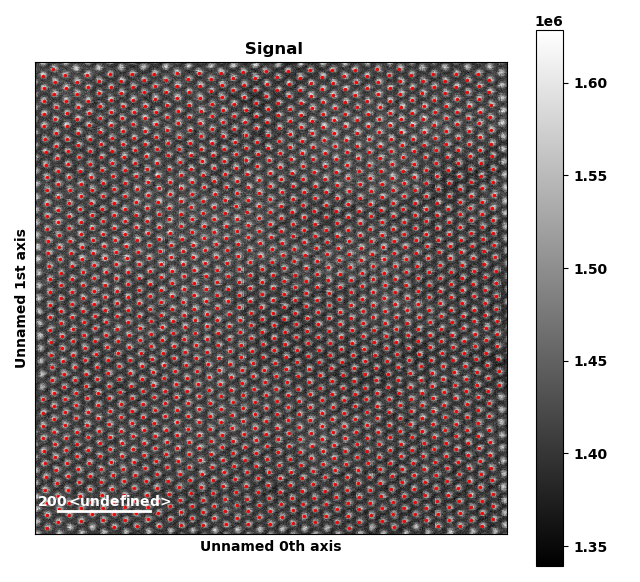

In [12]:
# Define the atom_lattice object and save the atomic coordinates

atom_lattice = am.Atom_Lattice(image=s.data, name='test', sublattice_list=[sublattice_A])
atom_lattice.save("/Michel/Datos/16/16.hdf5", overwrite=True)
atom_lattice.plot(markersize=2)

# Atom Lattice Analysis

The integrate() function returns a list containing:

Integrated intensity list - the same length as atom coordinates list with resulting integrated intensities.

Intensity record - Image the same size as input image, each pixel in a particular segment or region has the value of the integration of the region.

Point record - An image where defining the locations of each integration region.

<IPython.core.display.Javascript object>


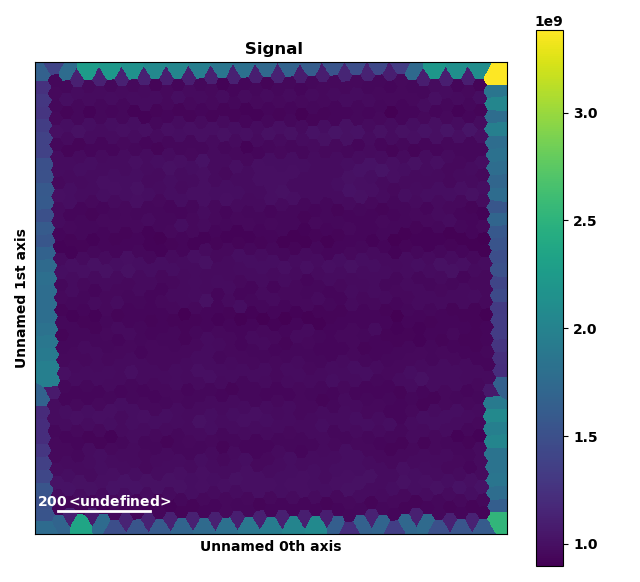

In [13]:
i_points, i_record, p_record = atom_lattice.integrate_column_intensity(method='Voronoi')
i_record.plot(cmap='viridis')

In [16]:
#Save image
i_record.change_dtype('float32')
i_record.save('/Michel/Datos/16/Voronoi.tif', overwrite=True)

# Atom Lattice statistical analysis

Plot the criteria of the Gaussian Mixture Model fitting in order to determine the number of different atomimc column intensities. It will try fitting between 1 and tot_atom_nums number of Gaussians.

<IPython.core.display.Javascript object>


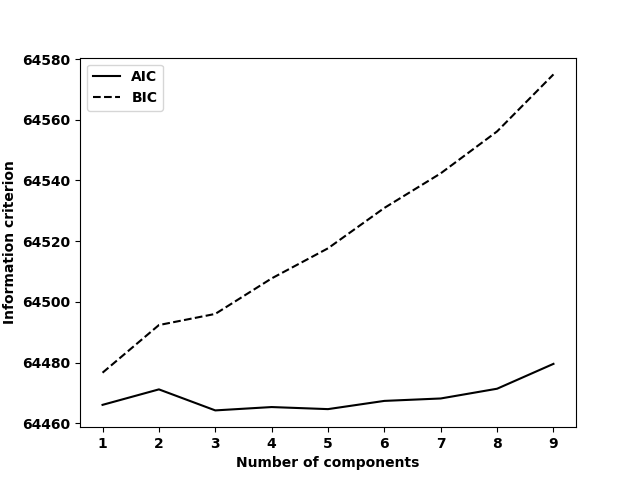

In [18]:
models = am.quant.get_statistical_quant_criteria([sublattice_A], 10)

<IPython.core.display.Javascript object>


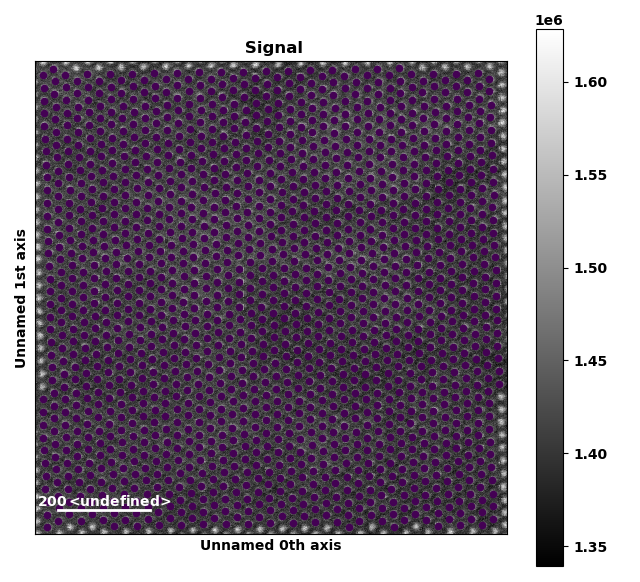

<IPython.core.display.Javascript object>


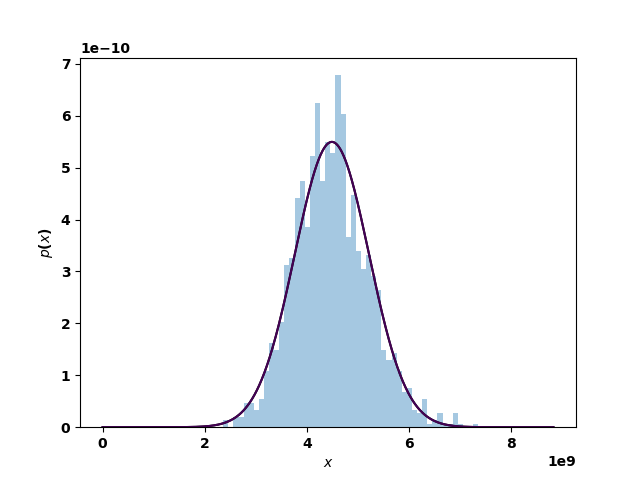

In [20]:
#Inset number of different atoms
atoms = 1

model = models[atoms-1] # 2nd model
atom_lattice_Q = am.quant.statistical_quant(s, sublattice_A, model, atoms)
